In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

from amftrack.pipeline.launching.run_super import (
    run_launcher,
    directory_scratch,
    directory_project,
    directory_project,
    run_parallel_stitch,
    run_parallel_transfer,
)
import os
from amftrack.util.sys import (
    get_dates_datetime,
    get_dirname,
    temp_path,
    get_data_info,
    update_plate_info,
    update_analysis_info,
    get_analysis_info,
    get_current_folders,
    get_folders_by_plate_id,
)

from time import time_ns
from amftrack.util.dbx import upload_folders, load_dbx, download, get_dropbox_folders
from datetime import datetime
from amftrack.pipeline.launching.run_super import (
    run_parallel,
    directory_scratch,
    directory_project,
    run_parallel_stitch,
)
from amftrack.util.dbx import read_saved_dropbox_state, get_dropbox_folders
import sys
import os

from amftrack.util.sys import get_dirname, temp_path
import pandas as pd
import ast
from scipy import sparse
import scipy.io as sio
import cv2
import imageio.v2 as imageio
import numpy as np
import scipy.sparse
import os
from time import time
from amftrack.pipeline.functions.image_processing.extract_skel import (
    extract_skel_new_prince,
    run_back_sub,
    bowler_hat,
)

from amftrack.util.sys import get_dates_datetime, get_dirname
import shutil
import matplotlib.pyplot as plt
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Experiment,
    save_graphs,
    load_graphs,
)
from amftrack.pipeline.functions.image_processing.experiment_util import (
    get_random_edge,
    distance_point_edge,
    plot_edge,
    plot_edge_cropped,
    find_nearest_edge,
    get_edge_from_node_labels,
    plot_full_image_with_features,
    get_all_edges,
    get_all_nodes,
    find_neighboring_edges,
    reconstruct_image,
    reconstruct_skeletton_from_edges,
    reconstruct_skeletton_unicolor,
    reconstruct_image_from_general,
    plot_full,
    plot_edge_color_value,
)
from matplotlib import cm

/gpfs/home2/cbisot/pycode/AMFtrack/amftrack/util/dbx.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
directory_targ = os.path.join(directory_scratch, "stitch_temp2") + "/"
directory_targ = directory_project

update_plate_info(directory_targ, local=True)
all_folders = get_current_folders(directory_targ, local=True)

analysed:   0%|          | 0/3670 [00:00<?, ?it/s]

In [10]:
plates = [
    "241_20230403",
    "247_20230422",
    # '24_20220426'
]
folders = all_folders.loc[all_folders["unique_id"] == "240_20230328"]
directory = directory_targ

In [3]:
plates = [
    "3_20220426",
    "12_20220502",
    "13_20220422",
    "16_20220419",
    "21_20220502",
    "480_20221205",
    "28_20230227",
    "206_20230303",
    "202_20230314",
    "218_20230227",
    "219_20230307",
    "229_20230330",
    "240_20230328",
]

In [4]:
folders = all_folders.loc[all_folders["unique_id"].isin(plates)]
folders.loc[folders["/Analysis/nx_graph_pruned.p"] == True]["strain"].unique()

array(["'Clarum'", "'Agg'", "'A5'", "'C3'"], dtype=object)

In [4]:
folders = all_folders.loc[all_folders["unique_id"] == "219_20230307"]
folders = folders.loc[folders["/Analysis/nx_graph_pruned.p"] == True]

In [10]:
folders = folders.sort_values(by="datetime")
folders
exp = Experiment(directory_targ)
t0 = 31
exp.load(folders.iloc[t0 : t0 + 1], suffix="_labeled")
exp.dates.sort()
for t in range(exp.ts):
    exp.load_tile_information(t)

load_graphs(exp, directory_targ, post_process=False, suffix="_labeled")

/gpfs/home2/cbisot/pycode/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["date"], format="%d.%m.%Y, %H:%M:"


2023-03-10 04:41:00


In [11]:
nodes = get_all_nodes(exp, t)
nodes = [node for node in nodes if node.degree(t) == 1]

In [12]:
nodes = [node for node in nodes if node.label == 678155]

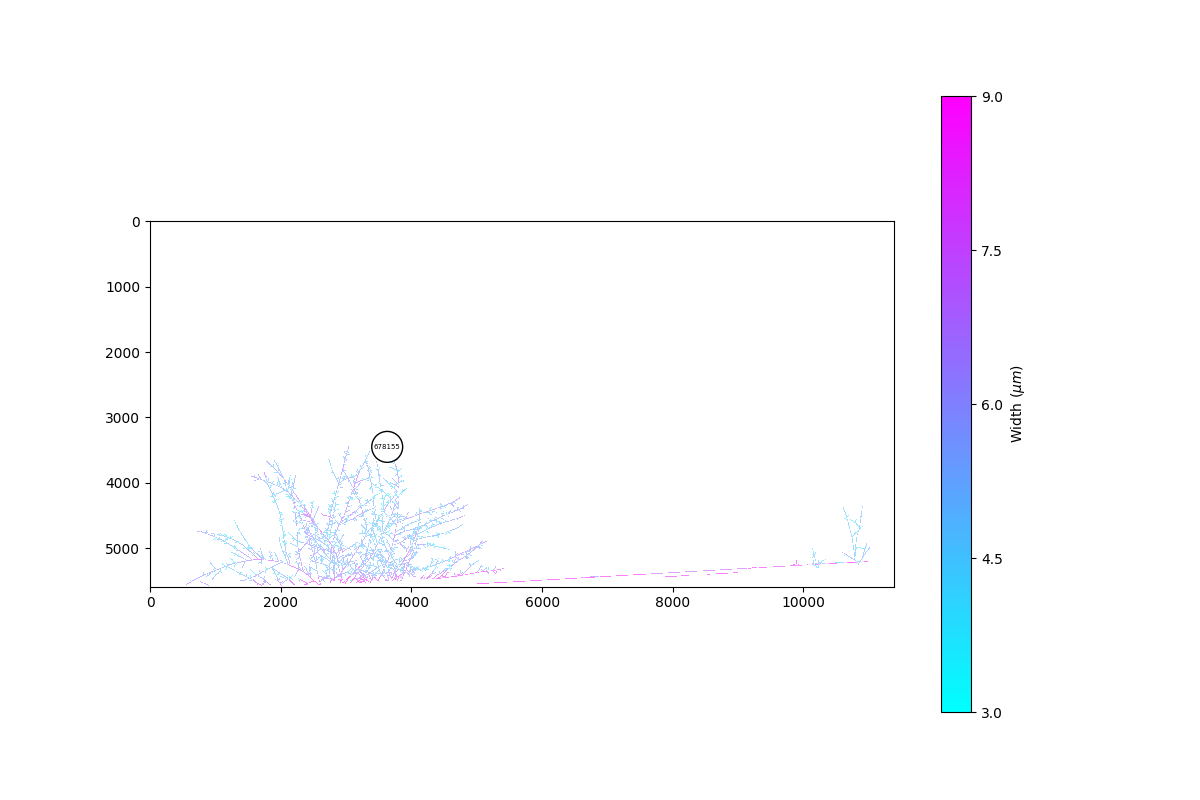

<AxesSubplot:>

In [9]:
vmax = 9
vmin = 3
plot_edge_color_value(
    exp,
    t,
    lambda edge: edge.width(t),
    cmap=cm.get_cmap("cool", 100),
    nodes=nodes,
    v_min=vmin,
    v_max=vmax,
    plot_cmap=True,
    show_background=False,
    dilation=10,
    figsize=(12, 8),
)

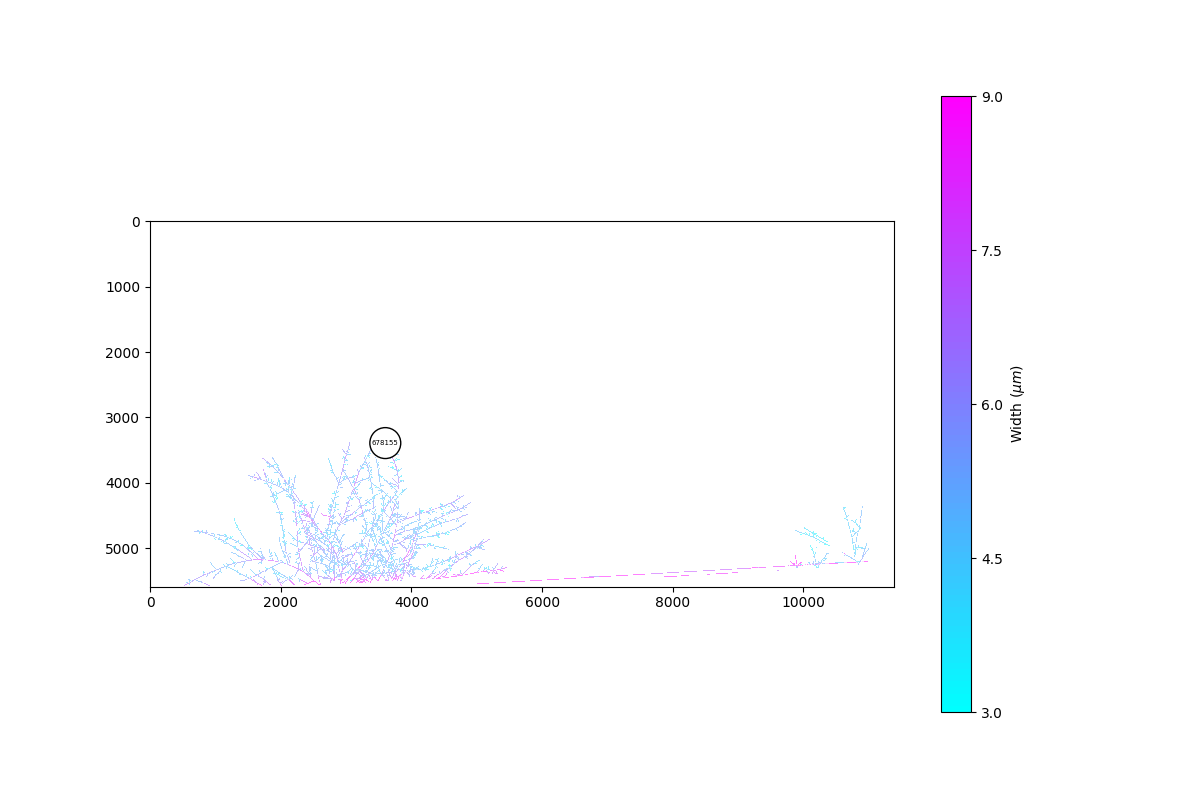

<AxesSubplot:>

In [13]:
vmax = 9
vmin = 3
plot_edge_color_value(
    exp,
    t,
    lambda edge: edge.width(t),
    cmap=cm.get_cmap("cool", 100),
    nodes=nodes,
    v_min=vmin,
    v_max=vmax,
    plot_cmap=True,
    show_background=False,
    dilation=10,
    figsize=(12, 8),
)

In [6]:
%matplotlib widget
t = 0
edges = get_all_edges(exp, t)
nodes = get_all_nodes(exp, t)

# edges_plot = [edge for edge in edges if edge.width(0) > 2]
edges_plot = edges

plot_full(
    exp,
    t,
    downsizing=5,
    edges=edges_plot,
    # nodes = nodes,
    dilation=4,
    prettify=False,
    figsize=(16, 12),
    # dpi=390,
    node_size=1.5,
    # save_path=path,
)

KeyError: 5964636

In [ ]:
from amftrack.pipeline.functions.image_processing.extract_width_fun import (
    get_width_info,
    get_width_info_new,
)

resolution = 10
skip = False
edge_test = get_width_info_new(exp, 0, resolution=resolution, skip=skip)

2023-05-29 11:20:32.184874: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-29 11:20:32.607343: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /gpfs/home2/cbisot/miniconda3/envs/amftrack/lib/python3.7/site-packages/cv2/../../lib64:
2023-05-29 11:20:32.607378: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-05-29 11:20:32.676785: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLA

True


In [11]:
list(exp.nx_graph[0].nodes)[0]

5964514

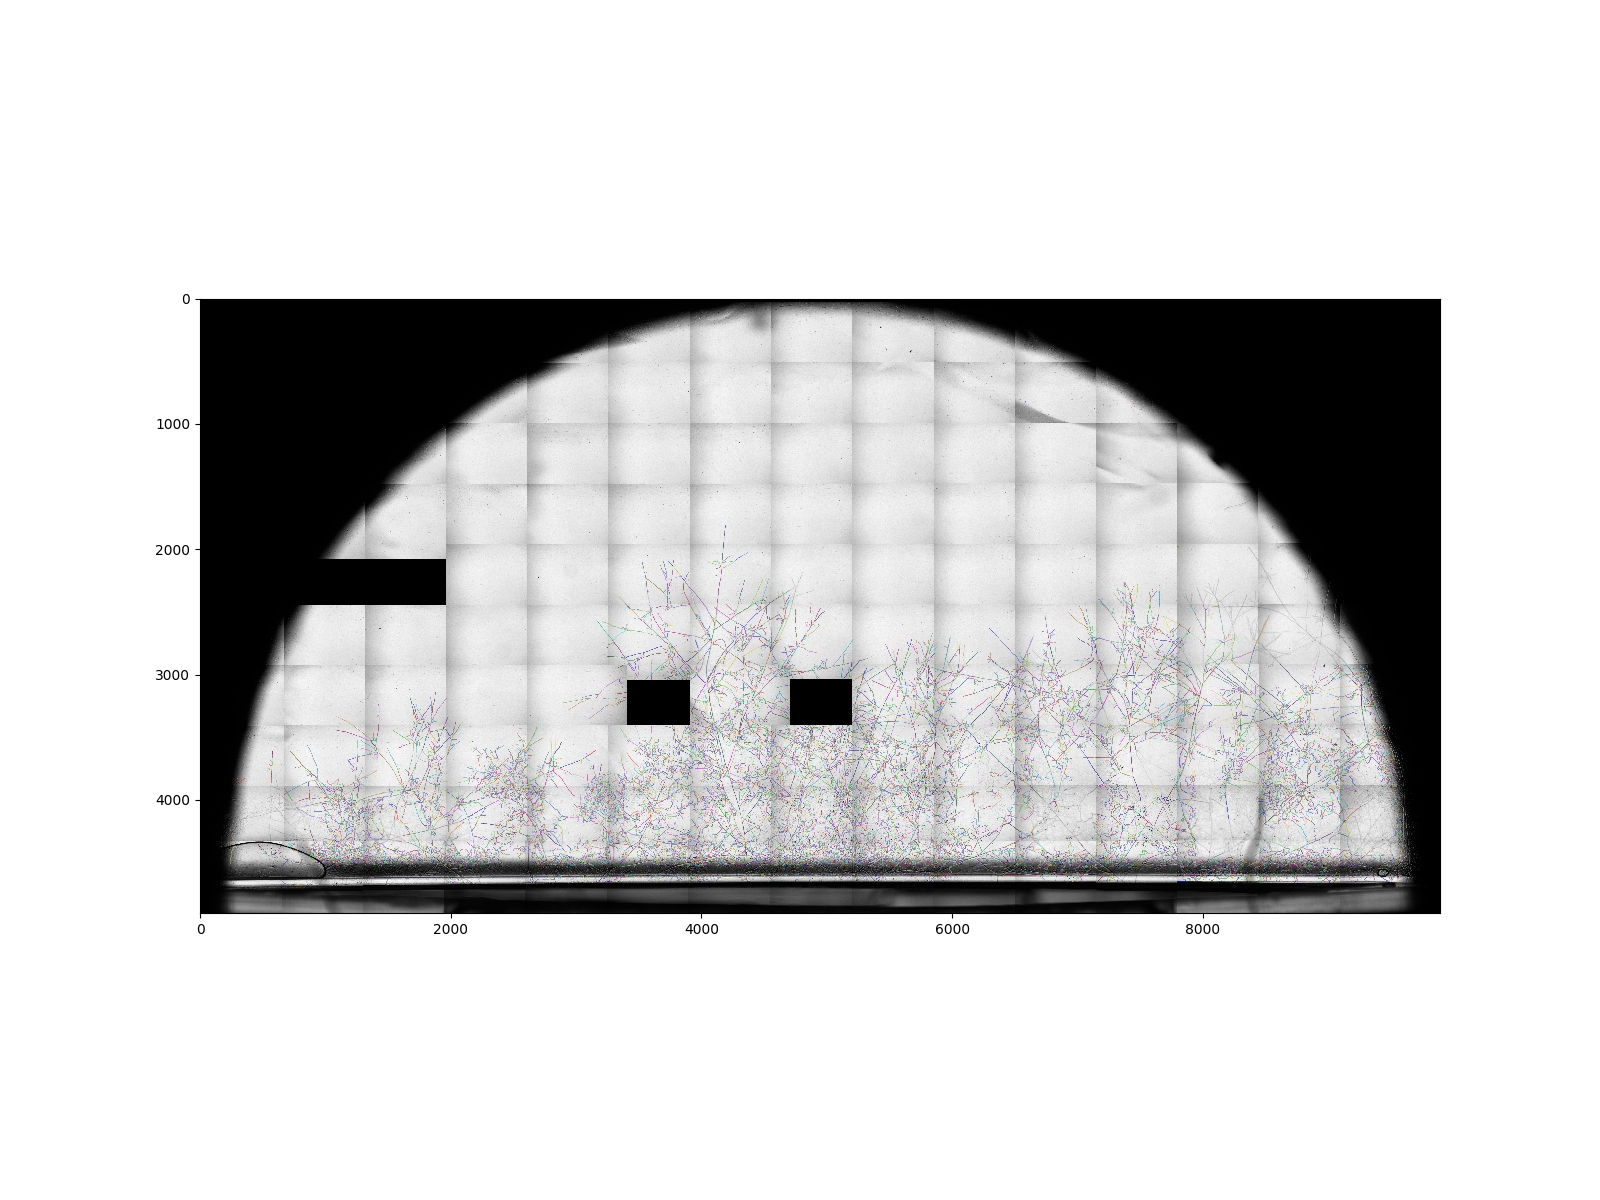

<AxesSubplot:>

In [ ]:
%matplotlib widget
t = 0
edges = get_all_edges(exp, t)
# edges_plot = [edge for edge in edges if edge.width(0) > 2]
edges_plot = edges

plot_full(
    exp,
    t,
    downsizing=5,
    edges=edges_plot,
    dilation=4,
    prettify=False,
    figsize=(16, 12),
    # dpi=390,
    node_size=1.5,
    # save_path=path,
)

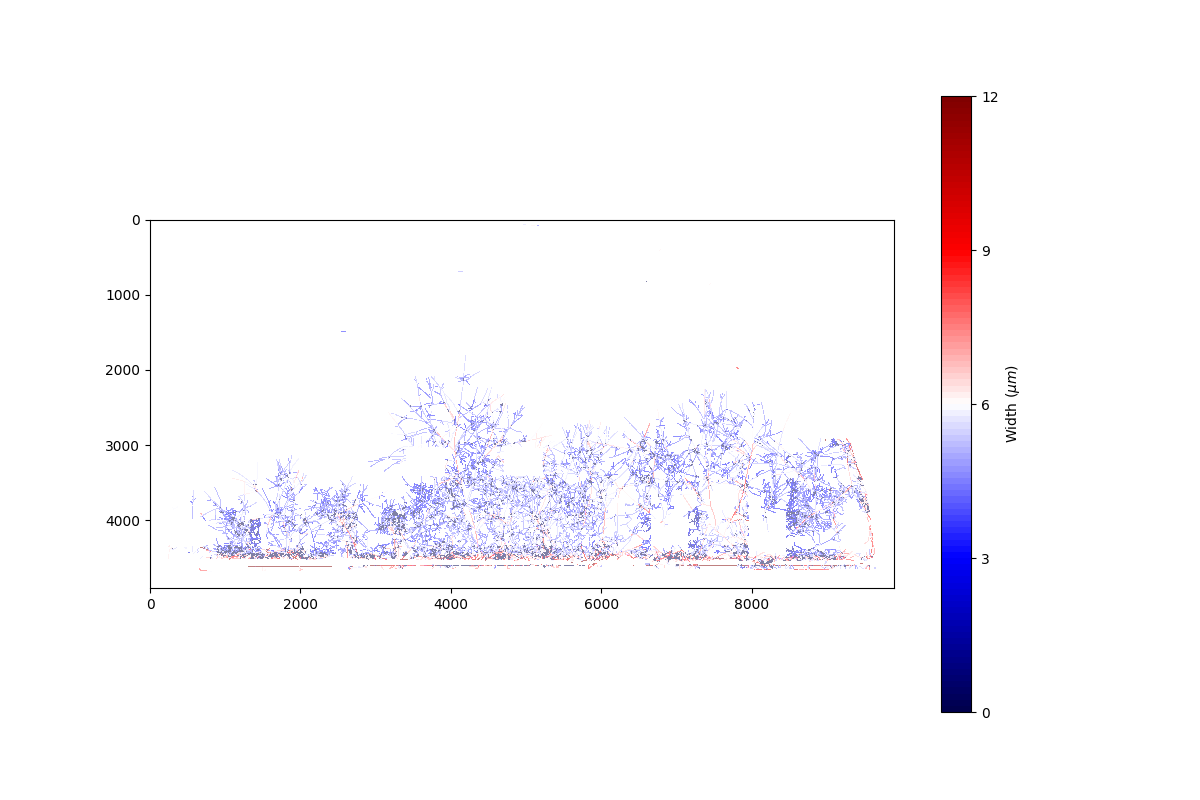

<AxesSubplot:>

In [10]:
vmax = 12
vmin = 0
plot_edge_color_value(
    exp,
    t,
    lambda edge: edge.width(t),
    cmap=cm.get_cmap("seismic", 100),
    v_min=vmin,
    v_max=vmax,
    plot_cmap=True,
    show_background=False,
    dilation=10,
    figsize=(12, 8),
)

In [11]:
edges = get_all_edges(exp, t)

In [14]:
lengths = [edge.length_um(t) for edge in edges]
widths = [edge.width(t) for edge in edges]

In [19]:
np.sum(lengths), np.sum([length for length in lengths if length < 100 / 1.725])

(6007282.338616412, 275745.14978718077)

(array([2054879.34256651,   68915.22749798, 1134470.42328685,
        1963284.53027221,  549190.12750799,  142181.14482111,
          42091.89492622,   25117.48418724,   14228.66418451,
          12923.49936581]),
 array([-0.42468584,  1.13233362,  2.68935308,  4.24637254,  5.803392  ,
         7.36041147,  8.91743093, 10.47445039, 12.03146985, 13.58848931,
        15.14550877]),
 <BarContainer object of 10 artists>)

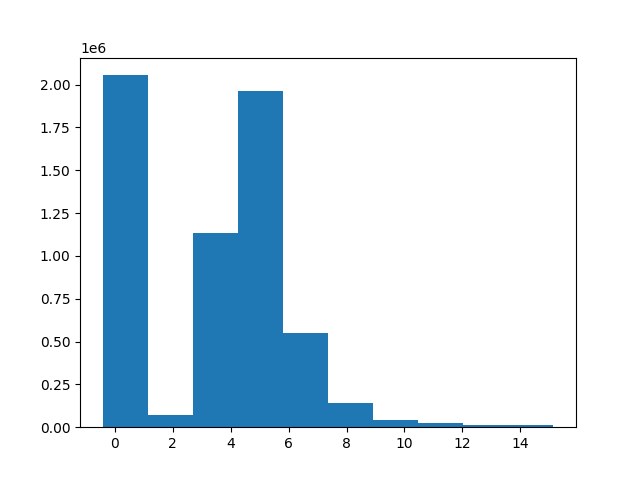

In [22]:
fig, ax = plt.subplots()
ax.hist(widths, weights=lengths)

In [11]:
i = 30
folder_list = list(folders["folder"])
folder_list.sort()
directory_name = folder_list[i]
print(directory_name)
run_back_sub(directory, directory_name)
path_snap = os.path.join(directory, directory_name)
path_tile = os.path.join(path_snap, "Img/TileConfiguration.txt.registered")
try:
    tileconfig = pd.read_table(
        path_tile,
        sep=";",
        skiprows=4,
        header=None,
        converters={2: ast.literal_eval},
        skipinitialspace=True,
    )
except:
    print("error_name")
    path_tile = os.path.join(path_snap, "Img/TileConfiguration.registered.txt")
    tileconfig = pd.read_table(
        path_tile,
        sep=";",
        skiprows=4,
        header=None,
        converters={2: ast.literal_eval},
        skipinitialspace=True,
    )
dirName = path_snap + "/Analysis"
try:
    os.mkdir(path_snap + "/Analysis")
    print("Directory ", dirName, " Created ")
except FileExistsError:
    print("Directory ", dirName, " already exists")
t = time()
xs = [c[0] for c in tileconfig[2]]
ys = [c[1] for c in tileconfig[2]]
name = tileconfig[0][0]
imname = "/Img3/" + name.split("/")[-1]
im = imageio.imread(directory + directory_name + imname)
dim = (
    int(np.max(ys) - np.min(ys)) + max(im.shape),
    int(np.max(xs) - np.min(xs)) + max(im.shape),
)
ims = []
skel = np.zeros(dim, dtype=np.uint8)
params = [30]

20230331_0749_Plate07


Java HotSpot(TM) 64-Bit Server VM warning: ignoring option PermSize=128m; support was removed in 8.0
Java HotSpot(TM) 64-Bit Server VM warning: Using incremental CMS is deprecated and will likely be removed in a future release


Directory  /projects/0/einf914/data/20230331_0749_Plate07/Analysis  Created 


/projects/0/einf914/data//20230331_0749_Plate07//Img2/Img_r07_c07.tif


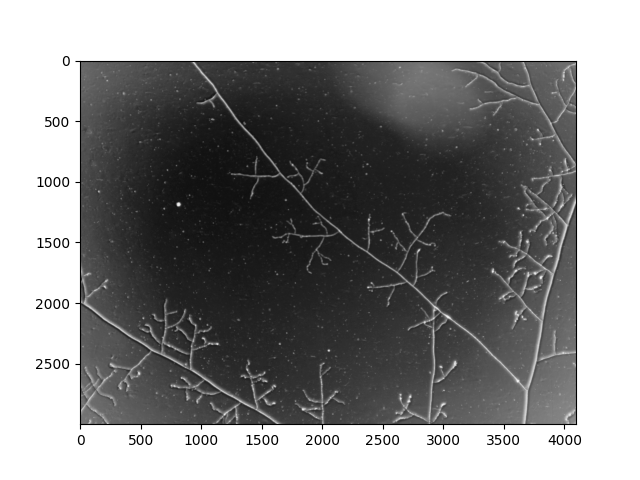

In [12]:
j = 73

for index, name in enumerate(tileconfig[0][j : j + 1]):
    # for index, name in enumerate(list_debug):
    print(name)
    imname = "/Img3/" + name.split("/")[-1]
    im = imageio.imread(directory + directory_name + imname)
    imname2 = "/Img/" + name.split("/")[-1]
    im2 = imageio.imread(directory + directory_name + imname2)
    bowled2 = bowler_hat(-im2, 32, params)
    im[bowled2 <= 0.09] = np.maximum(im[bowled2 <= 0.09], 250)
    fig, ax = plt.subplots()
    ax.imshow(im2, cmap="Greys")
    # shape = im.shape
    # print("segmenting")
    # segmented = extract_skel_new_prince(im, [hyph_width], perc_low, perc_high)
    # # low = np.percentile(-im+255, perc_low)
    # # high = np.percentile(-im+255, perc_high)
    # # segmented = filters.apply_hysteresis_threshold(-im+255, low, high)
    # boundaries = int(tileconfig[2][index][0] - np.min(xs)), int(
    #     tileconfig[2][index][1] - np.min(ys)
    # )
    # skel[
    #     boundaries[1] : boundaries[1] + shape[0],
    #     boundaries[0] : boundaries[0] + shape[1],
    # ] += segmented

In [13]:
hyph_width = 30
perc_low = 85
perc_high = 99.5
minlow = 10
minhigh = 70
connected = extract_skel_new_prince(
    im, [hyph_width], perc_low, perc_high, minlow, minhigh
)

anis filtering
image_reading


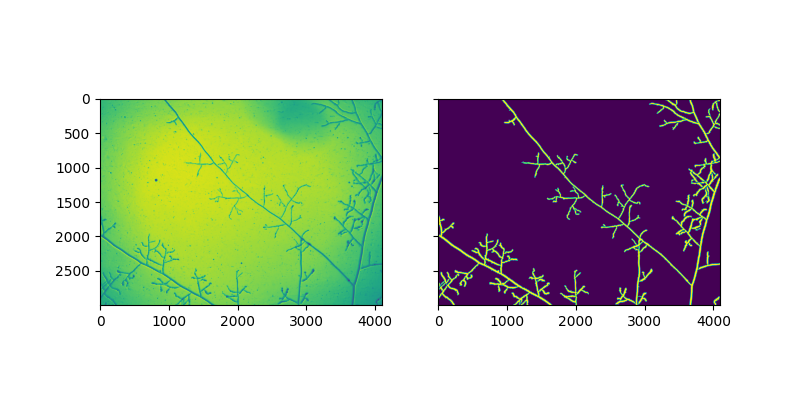

In [14]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8, 4))
ax[0].imshow(im2)
ax[1].imshow(connected)

In [16]:
from amftrack.pipeline.functions.image_processing.extract_skel import *

hyph_width = 30
perc_low = 93
perc_high = 99.5
bowled = bowler_hat(-im.astype(np.uint8), 32, params)
filename = time_ns()
place_save = temp_path
to_smooth = np.minimum(bowled * 255, 255 - im)
# to_smooth = 255-im
imtransformed_path = f"{place_save}/{filename}.tif"
imageio.imsave(imtransformed_path, to_smooth.astype(np.uint8))
path_anis = pastis_path
args = [0.1, 7, 0.9, 10, 50]
command = [path_anis, imtransformed_path] + args
command = [str(elem) for elem in command]
print("anis filtering")
process = subprocess.run(command, cwd=place_save, stdout=subprocess.DEVNULL)
foldname = f"{filename}_ani-K{int(args[0]*10)}s{args[1]}g{int(args[2]*10)}itD{args[3]}"
imname = foldname + f"/{foldname}it{args[4]}.tif"
path_modif = place_save + "/" + imname
try:
    im3 = imageio.imread(path_modif)
except:
    im3 = to_smooth.astype(np.uint8)
print("image_reading")
# shutil.rmtree(os.path.join(place_save, foldname))
low = max(20, np.percentile(im3, perc_low))
high = max(90, np.percentile(im3, perc_high))
transformed = im3
hyst = filters.apply_hysteresis_threshold(transformed, low, high)
dilated = remove_holes(hyst)
dilated = dilated.astype(np.uint8)
connected = remove_component(dilated)

anis filtering
image_reading


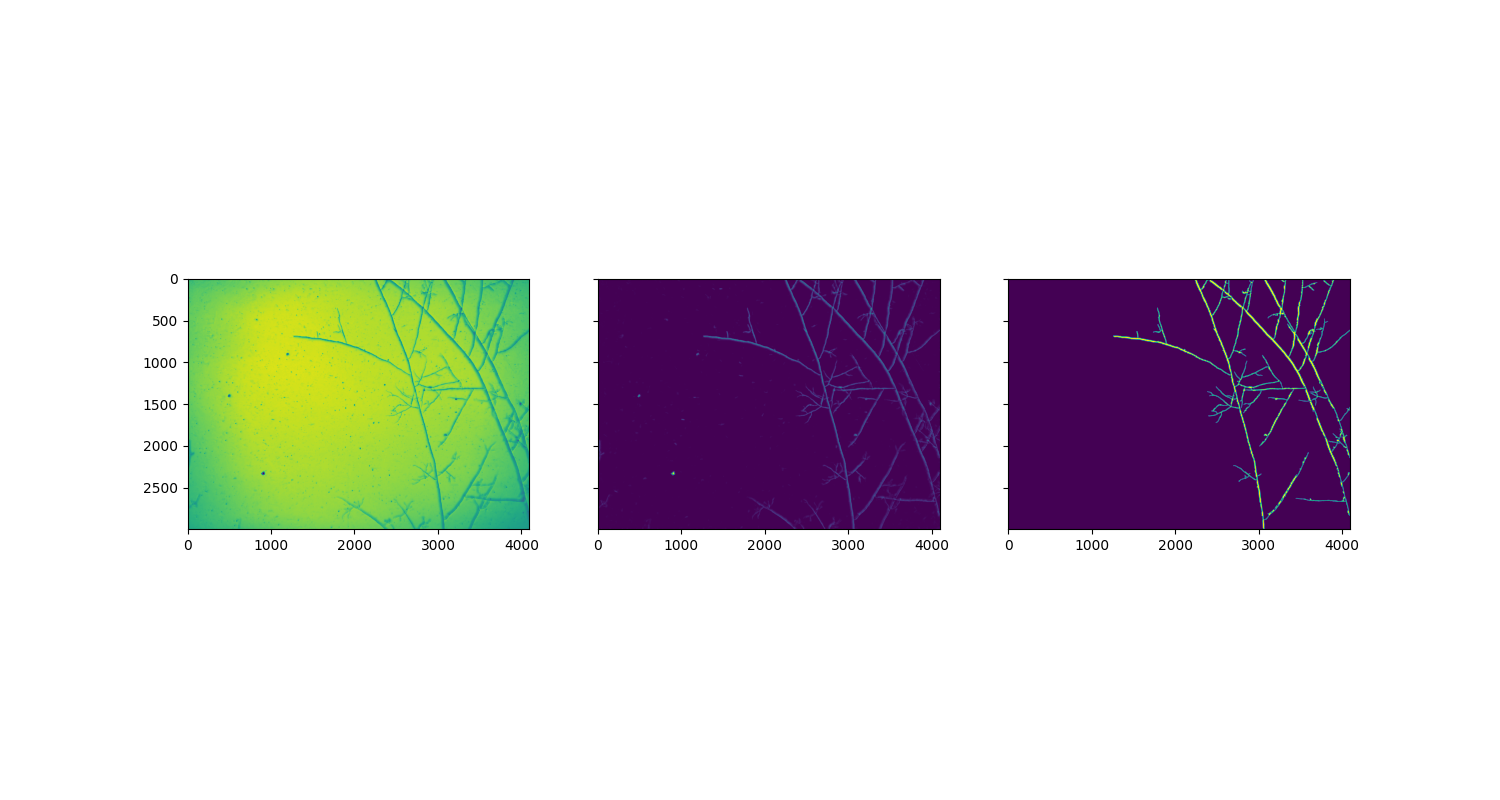

In [17]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15, 8))
ax[0].imshow(im2)
ax[1].imshow(im3)
ax[2].imshow(connected)

In [65]:
skeletonized = cv2.ximgproc.thinning(np.array(255 * (connected > 0), dtype=np.uint8))

In [58]:
import sys

from scipy import sparse
from pymatreader import read_mat

from amftrack.util.sys import temp_path
from amftrack.pipeline.functions.image_processing.extract_graph import (
    from_sparse_to_graph,
    generate_nx_graph,
    clean_degree_4,
)
from amftrack.pipeline.functions.image_processing.node_id import remove_spurs
import scipy.sparse
import pickle
import pandas as pd

skeleton = scipy.sparse.dok_matrix(skeletonized)
nx_graph, pos = generate_nx_graph(from_sparse_to_graph(skeleton))
# Optional, to remove spurs
nx_graph, pos = remove_spurs(nx_graph, pos)

nx_graph_pruned = clean_degree_4(nx_graph, pos)[0]

cleaning, number of nodes before 3327
number of unsolved cases 513
number of unsolved cases 303
number of unsolved cases 247
number of unsolved cases 235
number of unsolved cases 224
number of unsolved cases 219
number of unsolved cases 219
number of unsolved cases 218
end cleaning, number of nodes after 2763
